THIS NOTEBOOK EXAMINES THE FANG STOCKS AND RELATIONSHIP TO SPY, QQQ

In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import pandas_datareader.data as web
from datetime import datetime
from __future__ import division

In [2]:
# Create FANG list
fang = ["FB", "AMZN", "NFLX", "GOOG"]

# set up start (2 years ago) and end date times
end = datetime.now()
start = datetime(end.year - 2, end.month, end.day)

#create for loop to grab yahoo finance data and set as dataframe
for stock in fang:
    globals()[stock] = web.DataReader(stock,'yahoo',start,end)

In [3]:
# put all closing prices for FANG list into one DataFrame
closing_df = web.DataReader(['FB','AMZN','NFLX','GOOG'],'yahoo',start,end)['Adj Close']

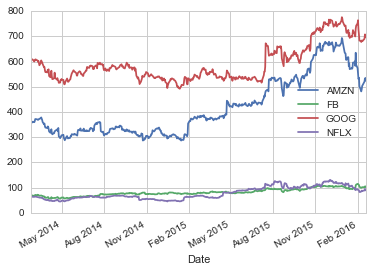

In [4]:
closing_df.plot()

In [12]:
returns = closing_df.pct_change()
returns.head()

,AMZN,FB,GOOG,NFLX
Date,,,,
2014-02-24,NaN,NaN,NaN,NaN
2014-02-25,0.018591,-0.013139,0.006177,0.013490
2014-02-26,0.004130,-0.008447,0.000139,-0.009359
2014-02-27,0.000917,-0.004620,-0.000787,0.007665
2014-02-28,0.005470,-0.006963,-0.002920,-0.014594


In [13]:
ret_index = (1 + returns).cumprod()
ret_index[0] = 1

In [15]:
del ret_index[0]
ret_index.head()

,AMZN,FB,GOOG,NFLX
Date,,,,
2014-02-24,NaN,NaN,NaN,NaN
2014-02-25,1.018591,0.986861,1.006177,1.013490
2014-02-26,1.022798,0.978525,1.006317,1.004004
2014-02-27,1.023736,0.974004,1.005526,1.011700
2014-02-28,1.029337,0.967222,1.002590,0.996935


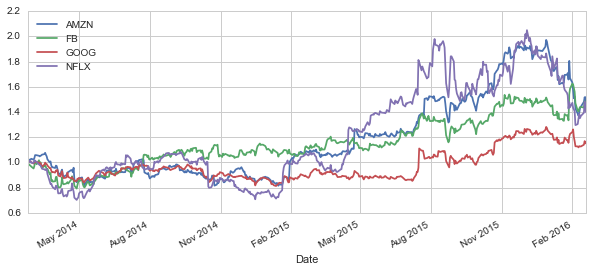

In [17]:
ret_index.plot(legend=True,figsize=(10,4))

In [18]:
returns_test = pd.DataFrame(
        {'Stock A': [0.1, 0.24, 0.05, -0.02, 0.2],
         'Stock B': [-0.15, -0.2, -0.01, 0.04, -0.15]})
returns_test

,Stock A,Stock B
0,0.10,-0.15
1,0.24,-0.20
2,0.05,-0.01
3,-0.02,0.04
4,0.20,-0.15


In [19]:
def new_portfolio(tickers,weights=None):
    if weights is None:
        shares = np.ones(len(tickers))/len(tickers)
    portf = pd.DataFrame({'Tickers': tickers, 'Weights': weights},index=tickers)
    return portf

In [20]:
portfolio = new_portfolio(fang, [1, 1, 1, 1])
portfolio

,Tickers,Weights
FB,FB,1
AMZN,AMZN,1
NFLX,NFLX,1
GOOG,GOOG,1


In [29]:
total_weights = portfolio.Weights.sum()
total_weights

4

In [34]:
creturns = returns.dropna(how='all')
creturns.head()

,AMZN,FB,GOOG,NFLX
Date,,,,
2014-02-25,0.018591,-0.013139,0.006177,0.013490
2014-02-26,0.004130,-0.008447,0.000139,-0.009359
2014-02-27,0.000917,-0.004620,-0.000787,0.007665
2014-02-28,0.005470,-0.006963,-0.002920,-0.014594
2014-03-03,-0.006407,-0.015337,-0.010661,-0.000090


In [35]:
def create_index(port,rtns,name='Index'):
    total_weights = port.Weights.sum()
    weighted_rtns = rtns * (port.Weights / total_weights)
    return pd.DataFrame({name: weighted_rtns.sum(axis=1)})

In [42]:
wr = create_index(portfolio, returns, 'Index')
with_index = pd.concat([returns, wr], axis=1)
rtns_w_index = with_index.dropna(how='all')
rtns_w_index.head()

,AMZN,FB,GOOG,NFLX,Index
Date,,,,,
2014-02-25,0.018591,-0.013139,0.006177,0.013490,0.006280
2014-02-26,0.004130,-0.008447,0.000139,-0.009359,-0.003384
2014-02-27,0.000917,-0.004620,-0.000787,0.007665,0.000794
2014-02-28,0.005470,-0.006963,-0.002920,-0.014594,-0.004752
2014-03-03,-0.006407,-0.015337,-0.010661,-0.000090,-0.008124


In [43]:
rtns_w_index.std()

AMZN     0.021610
FB       0.019904
GOOG     0.016588
NFLX     0.029771
Index    0.017073
dtype: float64

In [48]:
def make_chart_retns(rtns,title=None):
    rtns.plot(figsize=(12,8))
    plt.xlabel('Date')
    plt.ylabel('Returns')
    if title is not None: plt.title(title)
    plt.show()

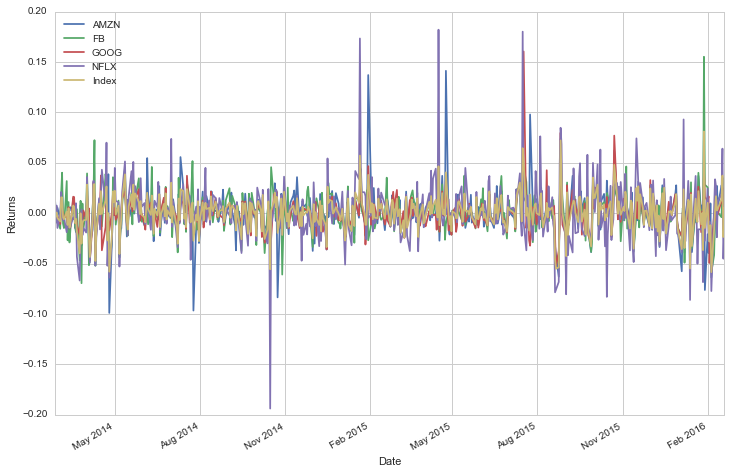

In [49]:
make_chart_retns(rtns_w_index)

In [50]:
# that is too much data on 1 chart - convert to index returns
ret_has_index = (1 + rtns_w_index).cumprod()
ret_has_index.head()

,AMZN,FB,GOOG,NFLX,Index
Date,,,,,
2014-02-25,1.018591,0.986861,1.006177,1.013490,1.006280
2014-02-26,1.022798,0.978525,1.006317,1.004004,1.002874
2014-02-27,1.023736,0.974004,1.005526,1.011700,1.003671
2014-02-28,1.029337,0.967222,1.002590,0.996935,0.998901
2014-03-03,1.022741,0.952388,0.991901,0.996846,0.990787


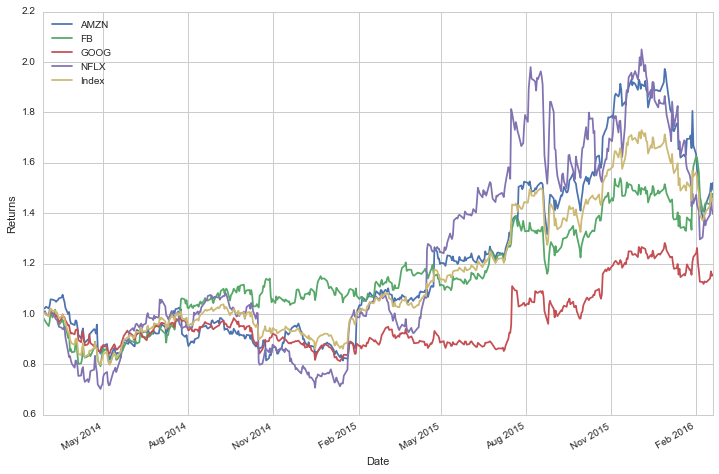

In [51]:
make_chart_retns(ret_has_index)

In [52]:
# lets look at fangs in relation to S&P 500 (using SPY etf) and tech index (using QQQ etf)
spyqqq_df = web.DataReader(['SPY','QQQ'],'yahoo',start,end)['Adj Close']

In [53]:
spyqqq_df.head()

,QQQ,SPY
Date,,
2014-02-24,88.153129,177.699168
2014-02-25,88.055619,177.631891
2014-02-26,87.977622,177.641511
2014-02-27,88.548431,178.573685
2014-02-28,88.450516,179.025343


In [54]:
# convert to returns similar to "ret_has_index" then concat
spyqqq_rtns_df = spyqqq_df.pct_change()

spyqqq_rtns_df.head()

,QQQ,SPY
Date,,
2014-02-24,NaN,NaN
2014-02-25,-0.001106,-0.000379
2014-02-26,-0.000886,0.000054
2014-02-27,0.006488,0.005248
2014-02-28,-0.001106,0.002529


In [57]:
spyqqq_index = (1 + spyqqq_rtns_df).cumprod()
spyqqq_index.head()

,QQQ,SPY
Date,,
2014-02-24,NaN,NaN
2014-02-25,0.998894,0.999621
2014-02-26,0.998009,0.999676
2014-02-27,1.004484,1.004921
2014-02-28,1.003374,1.007463


In [59]:
cspyqqq = spyqqq_index.dropna(how='all')
cspyqqq.head()

,QQQ,SPY
Date,,
2014-02-25,0.998894,0.999621
2014-02-26,0.998009,0.999676
2014-02-27,1.004484,1.004921
2014-02-28,1.003374,1.007463
2014-03-03,0.995932,1.000379


In [61]:
fang_v_index_df = pd.concat([ret_has_index, cspyqqq], axis=1)
fang_v_index_df.head()

,AMZN,FB,GOOG,NFLX,Index,QQQ,SPY
Date,,,,,,,
2014-02-25,1.018591,0.986861,1.006177,1.013490,1.006280,0.998894,0.999621
2014-02-26,1.022798,0.978525,1.006317,1.004004,1.002874,0.998009,0.999676
2014-02-27,1.023736,0.974004,1.005526,1.011700,1.003671,1.004484,1.004921
2014-02-28,1.029337,0.967222,1.002590,0.996935,0.998901,1.003374,1.007463
2014-03-03,1.022741,0.952388,0.991901,0.996846,0.990787,0.995932,1.000379


In [65]:
final_chart = fang_v_index_df.drop(['AMZN','FB','GOOG','NFLX'],axis=1)
final_chart.head()

,Index,QQQ,SPY
Date,,,
2014-02-25,1.006280,0.998894,0.999621
2014-02-26,1.002874,0.998009,0.999676
2014-02-27,1.003671,1.004484,1.004921
2014-02-28,0.998901,1.003374,1.007463
2014-03-03,0.990787,0.995932,1.000379


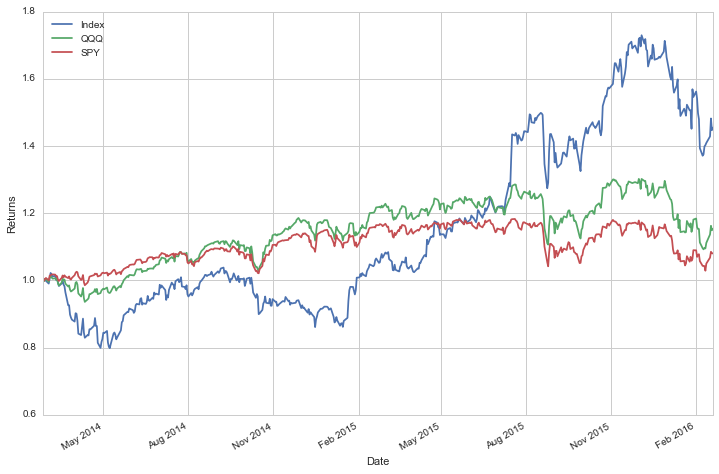

In [66]:
make_chart_retns(final_chart)

In [67]:
final_chart.tail()

,Index,QQQ,SPY
Date,,,
2016-02-12,1.409349,1.111929,1.050258
2016-02-16,1.428801,1.136999,1.067985
2016-02-17,1.482231,1.162749,1.085430
2016-02-18,1.447346,1.149477,1.080984
2016-02-19,1.454825,1.152880,1.080478


In [68]:
final_chart.describe()

,Index,QQQ,SPY
count,501.000000,501.000000,501.000000
mean,1.154079,1.148178,1.106078
std,0.260225,0.094070,0.053183
min,0.798555,0.936315,0.985945
25%,0.945361,1.081928,1.067463
50%,1.035022,1.163959,1.113328
75%,1.398992,1.219599,1.156789
max,1.729836,1.302386,1.183119


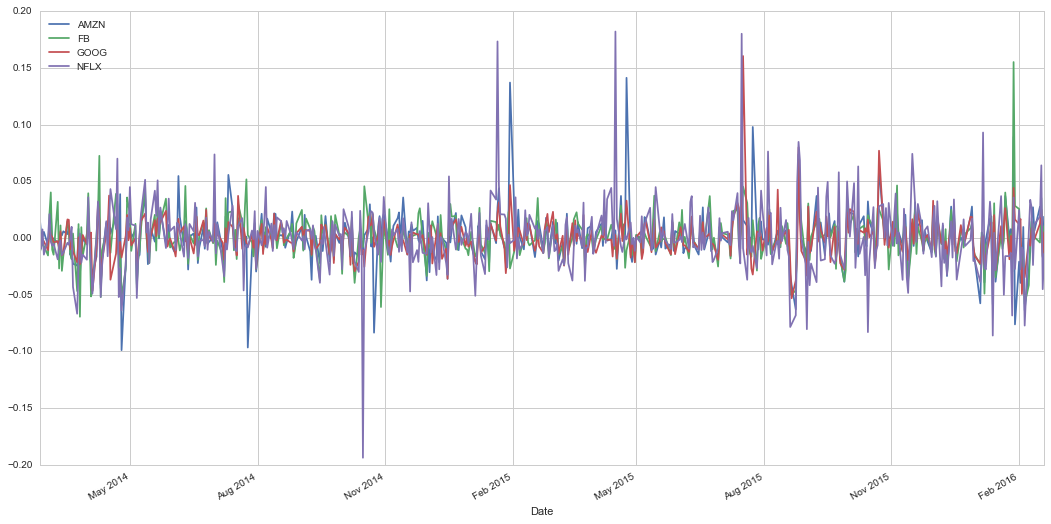

In [83]:
creturns.plot(legend=True,figsize=(18,9))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ec0c450>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1201d3750>]], dtype=object)

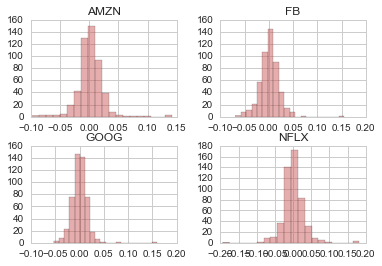

In [72]:
creturns.hist(color='indianred',alpha=0.5,bins=20)

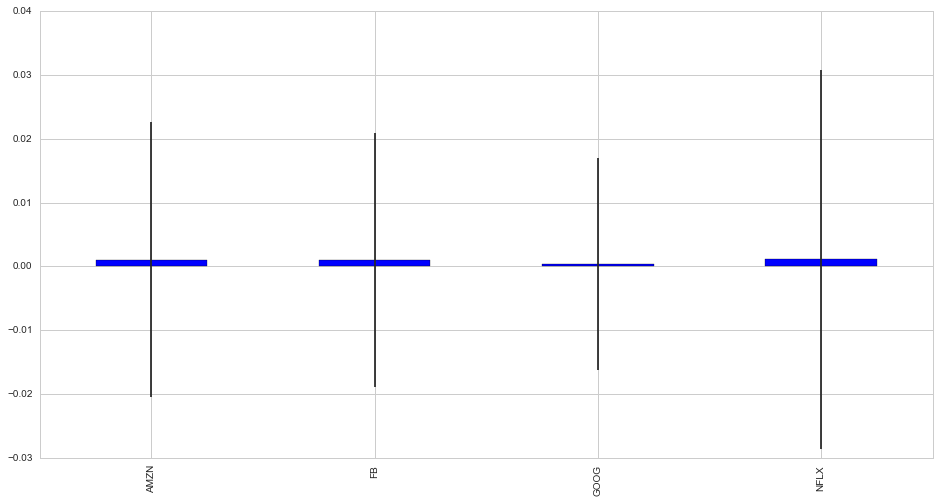

In [76]:
# Lets try to think of a better way to look at the variety of returns
avg = pd.DataFrame(creturns.mean()) 

# After that let's get the error
std = pd.DataFrame(creturns.std())

# now plot using pandas built-in plot, with kind='bar' and yerr='std'
avg.plot(yerr=std,kind='bar',legend=False,figsize=(16,8))

In [79]:
# it is easy to see that NFLX is the most volatile
creturns.describe()

,AMZN,FB,GOOG,NFLX
count,501.000000,501.000000,501.000000,501.000000
mean,0.001068,0.000975,0.000426,0.001106
std,0.021610,0.019904,0.016588,0.029771
min,-0.098828,-0.069348,-0.053105,-0.193696
25%,-0.009111,-0.010028,-0.008645,-0.012745
50%,0.000557,0.001097,-0.000154,-0.000448
75%,0.011671,0.011858,0.008905,0.014801
max,0.141311,0.155214,0.160524,0.182118


In [84]:
#ALL RETURNS
temp = spyqqq_rtns_df.dropna(how='all')
all_returns_df = pd.concat([rtns_w_index, temp], axis=1)
all_returns_df.head()

,AMZN,FB,GOOG,NFLX,Index,QQQ,SPY
Date,,,,,,,
2014-02-25,0.018591,-0.013139,0.006177,0.013490,0.006280,-0.001106,-0.000379
2014-02-26,0.004130,-0.008447,0.000139,-0.009359,-0.003384,-0.000886,0.000054
2014-02-27,0.000917,-0.004620,-0.000787,0.007665,0.000794,0.006488,0.005248
2014-02-28,0.005470,-0.006963,-0.002920,-0.014594,-0.004752,-0.001106,0.002529
2014-03-03,-0.006407,-0.015337,-0.010661,-0.000090,-0.008124,-0.007416,-0.007032


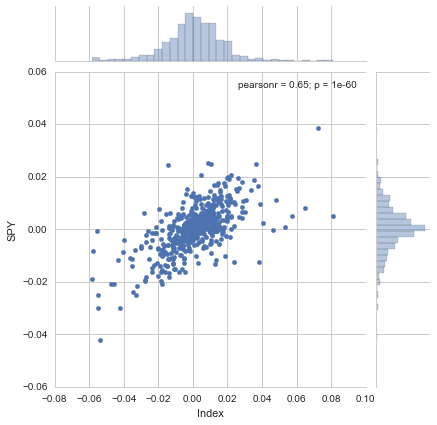

In [86]:
# We'll use joinplot to compare the daily returns of Fang Index and S&P 500
sns.jointplot('Index','SPY',all_returns_df,kind='scatter')

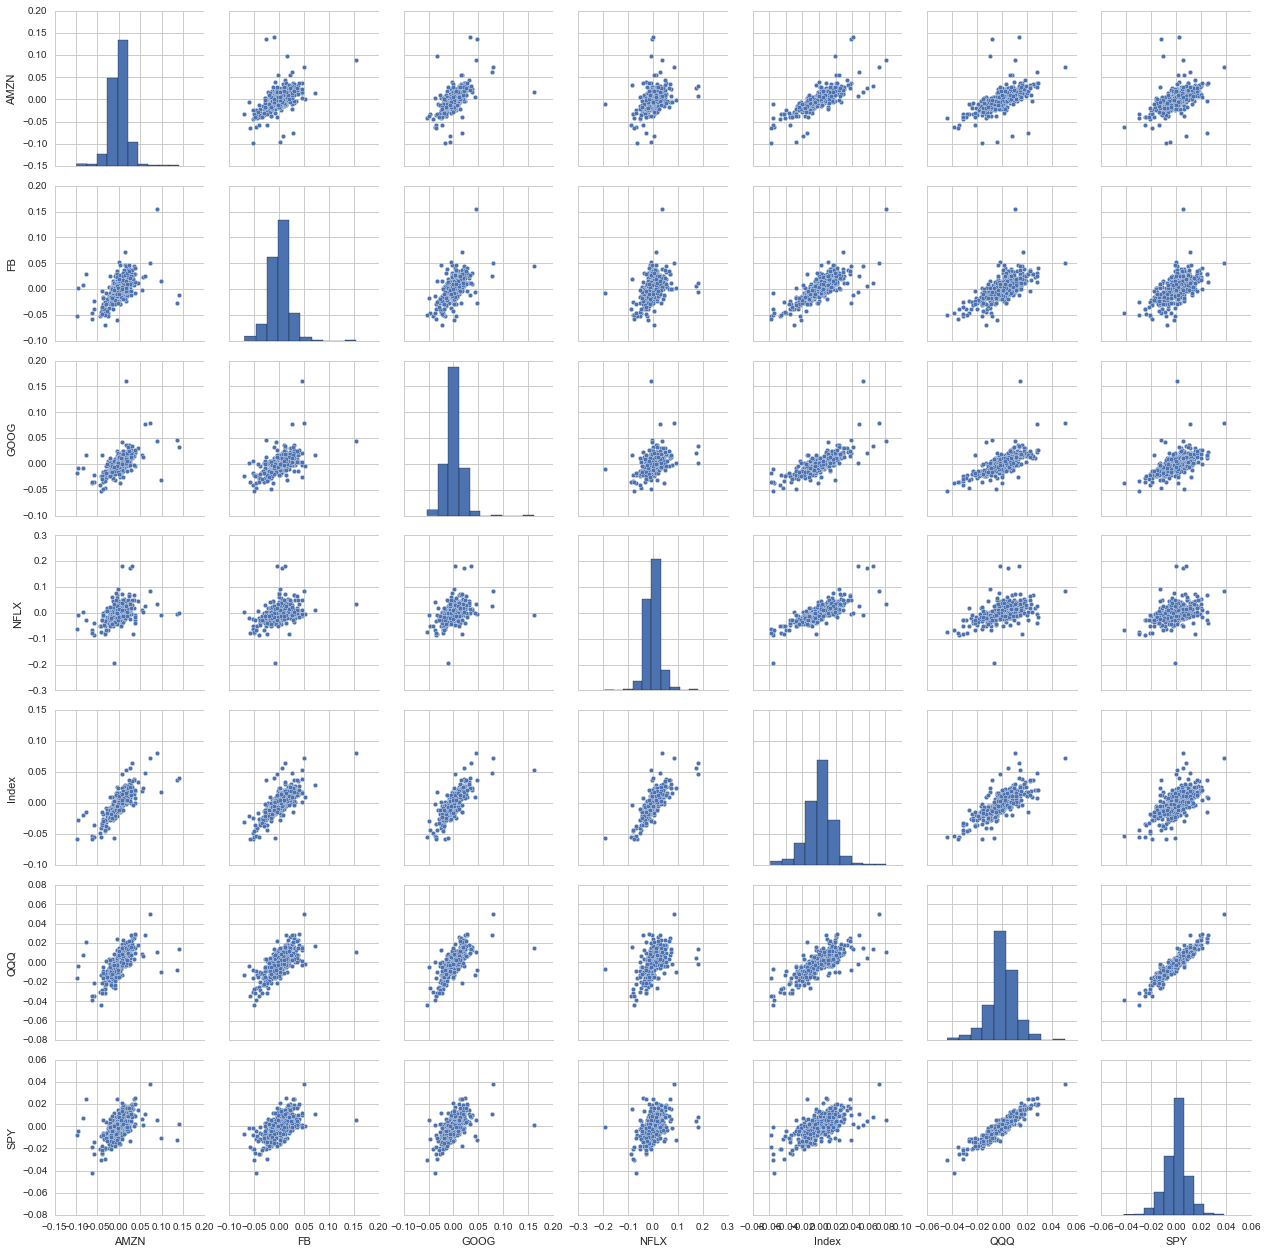

In [87]:
sns.pairplot(all_returns_df)

//anaconda/lib/python2.7/site-packages/seaborn/linearmodels.py:1285: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
//anaconda/lib/python2.7/site-packages/seaborn/linearmodels.py:1351: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


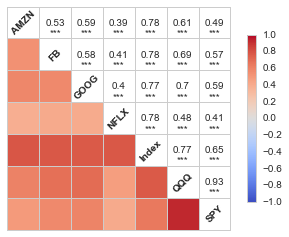

In [88]:
sns.corrplot(all_returns_df,annot=True)